# TSF - Task # 4 - To Explore Decision Tree Algorithm

### For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 

### Data can be found at -https://github.com/12KJaya/The-Sparks-Foundation-Data-Science-and-Analytics-Internship-/blob/master/Task-4/Iris.csv

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib  as plt
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('Iris.csv')

In [3]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [6]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
dataset.shape

(150, 6)

In [8]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [9]:
X=dataset
y=dataset["Species"]

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [11]:
X_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
6,7,4.6,3.4,1.4,0.3,Iris-setosa
29,30,4.7,3.2,1.6,0.2,Iris-setosa
101,102,5.8,2.7,5.1,1.9,Iris-virginica
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
136,137,6.3,3.4,5.6,2.4,Iris-virginica
13,14,4.3,3.0,1.1,0.1,Iris-setosa
141,142,6.9,3.1,5.1,2.3,Iris-virginica
131,132,7.9,3.8,6.4,2.0,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
99,100,5.7,2.8,4.1,1.3,Iris-versicolor


In [12]:
y_train

6          Iris-setosa
29         Iris-setosa
101     Iris-virginica
66     Iris-versicolor
136     Iris-virginica
13         Iris-setosa
141     Iris-virginica
131     Iris-virginica
146     Iris-virginica
99     Iris-versicolor
113     Iris-virginica
67     Iris-versicolor
97     Iris-versicolor
69     Iris-versicolor
114     Iris-virginica
119     Iris-virginica
117     Iris-virginica
59     Iris-versicolor
143     Iris-virginica
85     Iris-versicolor
51     Iris-versicolor
5          Iris-setosa
1          Iris-setosa
37         Iris-setosa
35         Iris-setosa
39         Iris-setosa
17         Iris-setosa
57     Iris-versicolor
65     Iris-versicolor
88     Iris-versicolor
            ...       
107     Iris-virginica
120     Iris-virginica
27         Iris-setosa
21         Iris-setosa
137     Iris-virginica
9          Iris-setosa
126     Iris-virginica
64     Iris-versicolor
68     Iris-versicolor
84     Iris-versicolor
75     Iris-versicolor
76     Iris-versicolor
26         

In [13]:
feature_cols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

In [14]:
X = dataset[feature_cols] # Features
y = dataset.Species # Target variable

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
clf = DecisionTreeClassifier()

In [17]:
clf = clf.fit(X_train,y_train)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


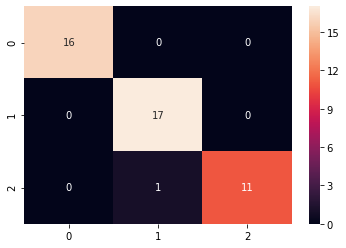

In [20]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

In [21]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



## Vizualizing Decision Trees 

In [22]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt

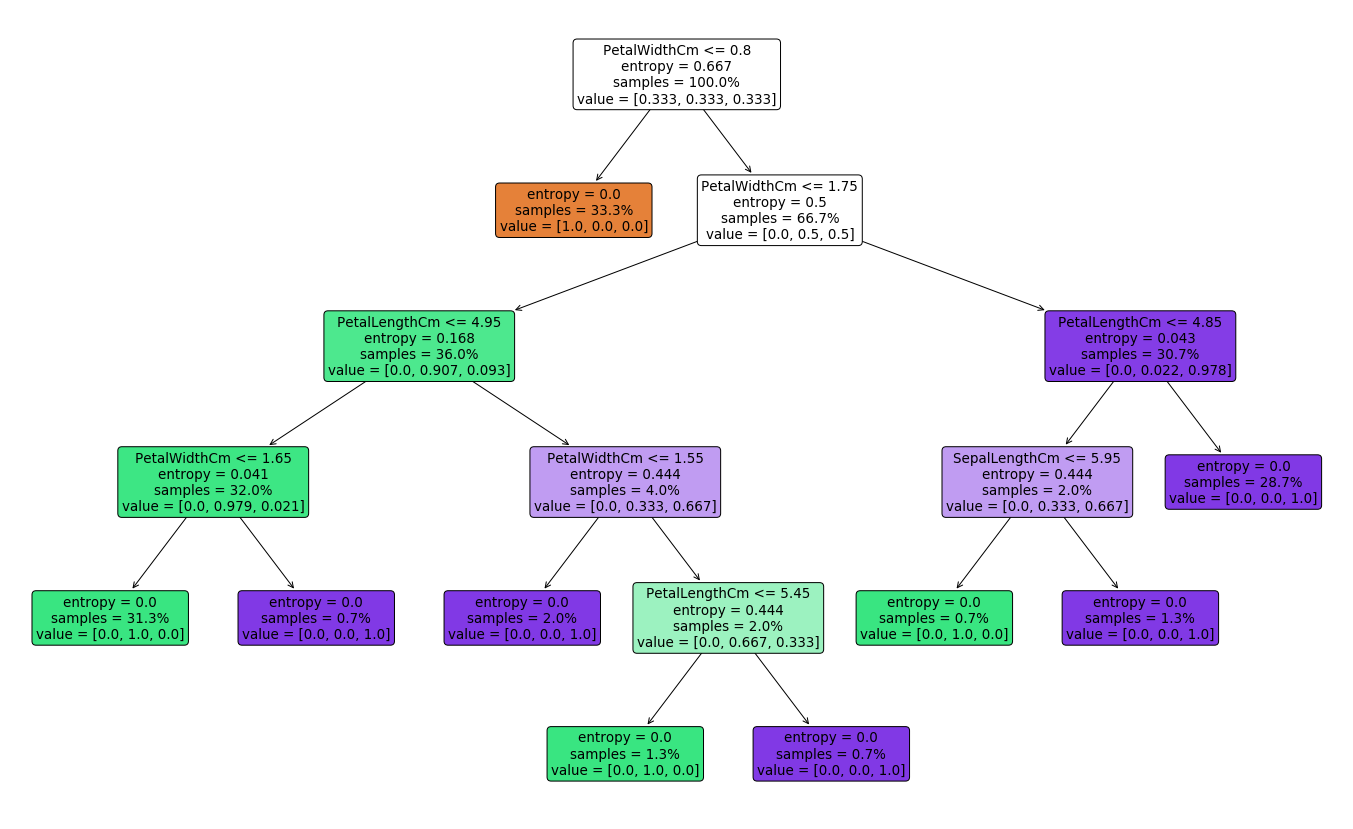

In [24]:
plt.figure(figsize=(24,15))
tree.plot_tree(clf.fit(X,y),feature_names=feature_cols,filled=True,precision=3,
              proportion=True,rounded=True)
plt.show()